In [1]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

In [2]:
basal_path = "/mnt/shared/nationwide/brca/basal.h5ad"
mcc_path = "/mnt/shared/nationwide/brca/mcc.h5ad"

In [3]:
# both are cell x gene datasets
basal_data = sc.read_h5ad(basal_path)
basal_data.obs_names_make_unique()
mcc_data = sc.read_h5ad(mcc_path)
mcc_data.obs_names_make_unique()

# What the Data Looks Like

In [4]:
basal_data.var.head()

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSMUSG00000051951,False,Xkr4,NCBITaxon:10090,gene,6094
ENSMUSG00000089699,True,Gm1992,NCBITaxon:10090,gene,250
ENSMUSG00000102343,False,Gm37381,NCBITaxon:10090,gene,1364
ENSMUSG00000025900,False,Rp1,NCBITaxon:10090,gene,12311
ENSMUSG00000025902,True,Sox17,NCBITaxon:10090,gene,4772


In [5]:
basal_data.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,clusters_resolution0.1,tricyclePosition,S_Score_UCell,G2M_Score_UCell,pseudo_cycling,assay_ontology_term_id,...,cluster_names,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
ACTTTGTGTACCTGTA-4_1,Ad1_agg_soupx,16040.970516,4370,6.678489,0,0.758632,0.0000,0.045808,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,a3pgQHXhnN
ATGCATGAGGTCCAGA-4_1,Ad1_agg_soupx,17691.855279,4273,7.738218,0,0.735634,0.0000,0.038372,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,p?3!9-9X^g
TCCAGAATCGAGATGG-2_1,Ad1_agg_soupx,29498.814882,5629,9.047998,0,0.084498,0.0000,0.055628,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,19+J(i5C8`
GTAACCAAGACGAAGA-3_1,Ad1_agg_soupx,13798.422319,3926,8.300221,0,0.642403,0.0276,0.051256,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,!eAd;;=5^A
CCGCAAGTCTCGAGTA-4_1,Ad1_agg_soupx,13068.181813,3888,6.621614,0,0.308792,0.0000,0.046321,NaN,EFO:0009922,...,Basal stem,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,*F<d!A@q;|


In [6]:
mcc_data.var.head()

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSMUSG00000051951,False,Xkr4,NCBITaxon:10090,gene,6094
ENSMUSG00000089699,True,Gm1992,NCBITaxon:10090,gene,250
ENSMUSG00000102343,False,Gm37381,NCBITaxon:10090,gene,1364
ENSMUSG00000025900,False,Rp1,NCBITaxon:10090,gene,12311
ENSMUSG00000025902,True,Sox17,NCBITaxon:10090,gene,4772


In [7]:
mcc_data.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,multiciliated_cluster_names,tricyclePosition,S_Score_UCell,G2M_Score_UCell,pseudotime,assay_ontology_term_id,...,tissue_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
CGTAATGAGACGCTCC-2_1,Ad1_agg_soupx,19518.324987,4433,5.208519,Intermediate,0.118006,0.025583,0.059141,NaN,EFO:0009922,...,CL:0000307,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,X2{9Ux~gML
GTTCTATCATAACGGG-1_1,Ad1_agg_soupx,21675.108920,4890,12.538229,Intermediate,5.959143,0.000000,0.037474,NaN,EFO:0009922,...,CL:0000307,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,urkt>^#}&+
CGCATGGCAATCAGCT-2_1,Ad1_agg_soupx,18882.919937,4652,13.654773,Multciliated 1,2.686352,0.064267,0.089167,9.672982,EFO:0009922,...,CL:0000307,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,bx_BF=f^=<
TCAGCAATCTTCGATT-4_1,Ad1_agg_soupx,26681.978384,5267,7.060324,Intermediate,0.228580,0.000000,0.039103,NaN,EFO:0009922,...,CL:0000307,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,Jkek~a0?fe
TAATTCCAGACTCTAC-2_1,Ad1_agg_soupx,20840.445310,4826,7.153432,Intermediate,0.471065,0.016900,0.022103,NaN,EFO:0009922,...,CL:0000307,tracheal epithelial cell,10x 3' v3,normal,Mus musculus,unknown,tracheal epithelial cell,na,mature stage,_T0KoxKwiX


In [8]:
mcc_data.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'multiciliated_cluster_names', 'tricyclePosition', 'S_Score_UCell',
       'G2M_Score_UCell', 'pseudotime', 'assay_ontology_term_id',
       'cell_type_ontology_term_id', 'development_stage_ontology_term_id',
       'disease_ontology_term_id', 'donor_id', 'is_primary_data',
       'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
       'sex_ontology_term_id', 'suspension_type', 'tissue_type',
       'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism',
       'sex', 'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')

# Data Vis / Exploration

In [9]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.histplot(mcc_data.obs["n_counts_all"], label="mcc", hue=0.5)
# sns.histplot(basal_data.obs["n_counts_all"], label="basal")

# plt.xlabel("Cells")
# plt.xlim(left=0,right=75000)
# plt.legend()
# plt.show()

# Normalization

In [10]:
basal_data.obs["type"] = 1
mcc_data.obs["type"] = 2

In [11]:
raw = ad.concat([basal_data, mcc_data])
adata = raw
# recipes do the normalization steps for us
sc.pp.recipe_zheng17(adata)

# Integration

In [12]:
sc.pp.pca(adata)
adata.obsm['X_pca']

array([[-1.05180130e+01,  2.96270418e+00, -2.62454724e+00, ...,
        -1.30034435e+00, -1.42539585e+00, -6.64061725e-01],
       [-1.03575430e+01,  4.82014418e+00, -2.67324567e+00, ...,
        -6.46014214e-02,  3.31558973e-01,  4.18796599e-01],
       [-9.82810879e+00,  4.08361340e+00, -3.07778406e+00, ...,
         1.95704055e+00, -8.35561216e-01,  2.54136848e+00],
       ...,
       [ 1.52782545e+01, -5.69369555e+00, -2.90003395e+00, ...,
         2.21092522e-01, -3.07165742e-01,  5.55848777e-01],
       [ 2.92110138e+01,  1.30835736e+00, -4.50991869e+00, ...,
        -5.29497981e-01, -1.61944613e-01,  1.36232591e+00],
       [-7.12333536e+00, -4.52408981e+00,  1.62610126e+00, ...,
         2.77886420e-01,  2.01179739e-03,  5.23905516e-01]], dtype=float32)

In [13]:
import scanpy.external as sce

sce.pp.scanorama_integrate(adata, 'type')

[[0.         0.26460893]
 [0.         0.        ]]
Processing datasets 1 <=> 2


In [14]:
sc.pp.neighbors(adata, use_rep="X_scanorama")
sc.tl.umap(adata)
sc.tl.leiden(
    adata, key_added="clusters", n_iterations=2, directed=False
)

/home/user/.conda/envs/python3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/user/.conda/envs/python3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


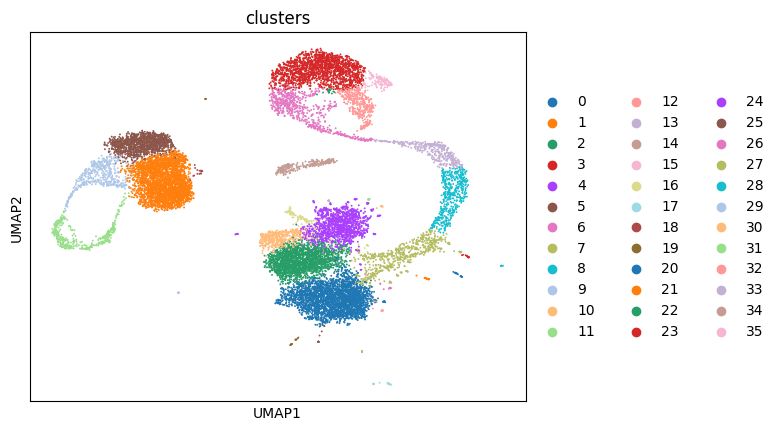

In [15]:
sc.pl.umap(
    adata, color=["clusters"], palette=sc.pl.palettes.default_20
)


# Datasets independent of one another

/home/user/.conda/envs/python3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


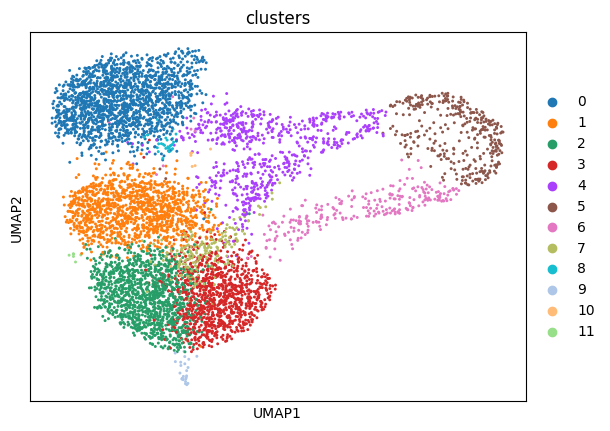

In [16]:
sc.pp.recipe_zheng17(basal_data)
sc.pp.pca(basal_data)
sc.pp.neighbors(basal_data, use_rep="X_pca")
sc.tl.umap(basal_data)
sc.tl.leiden(
    basal_data, key_added="clusters", n_iterations=2, directed=False
)
sc.pl.umap(
    basal_data, color=["clusters"], palette=sc.pl.palettes.default_20
)


/home/user/.conda/envs/python3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


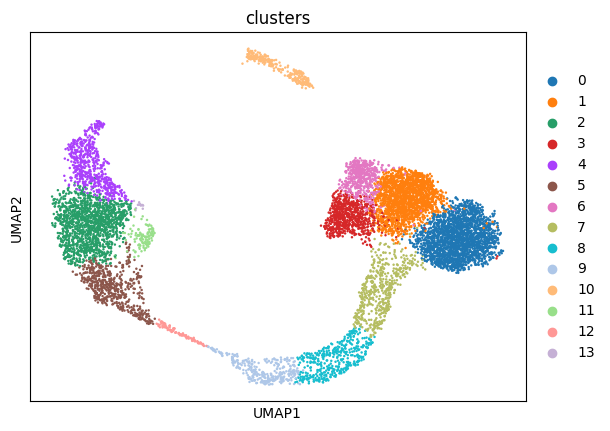

In [17]:
sc.pp.recipe_zheng17(mcc_data)
sc.pp.pca(mcc_data)
sc.pp.neighbors(mcc_data, use_rep="X_pca")
sc.tl.umap(mcc_data)
sc.tl.leiden(
    mcc_data, key_added="clusters", n_iterations=2, directed=False
)
sc.pl.umap(
    mcc_data, color=["clusters"], palette=sc.pl.palettes.default_20
)

# Metrics

In [18]:
from scib.metrics import metrics, cell_cycle, hvg_overlap

hvg_overlap(adata=adata, cluster_key="clusters", label_key="cell_type")

ModuleNotFoundError: No module named 'scib'